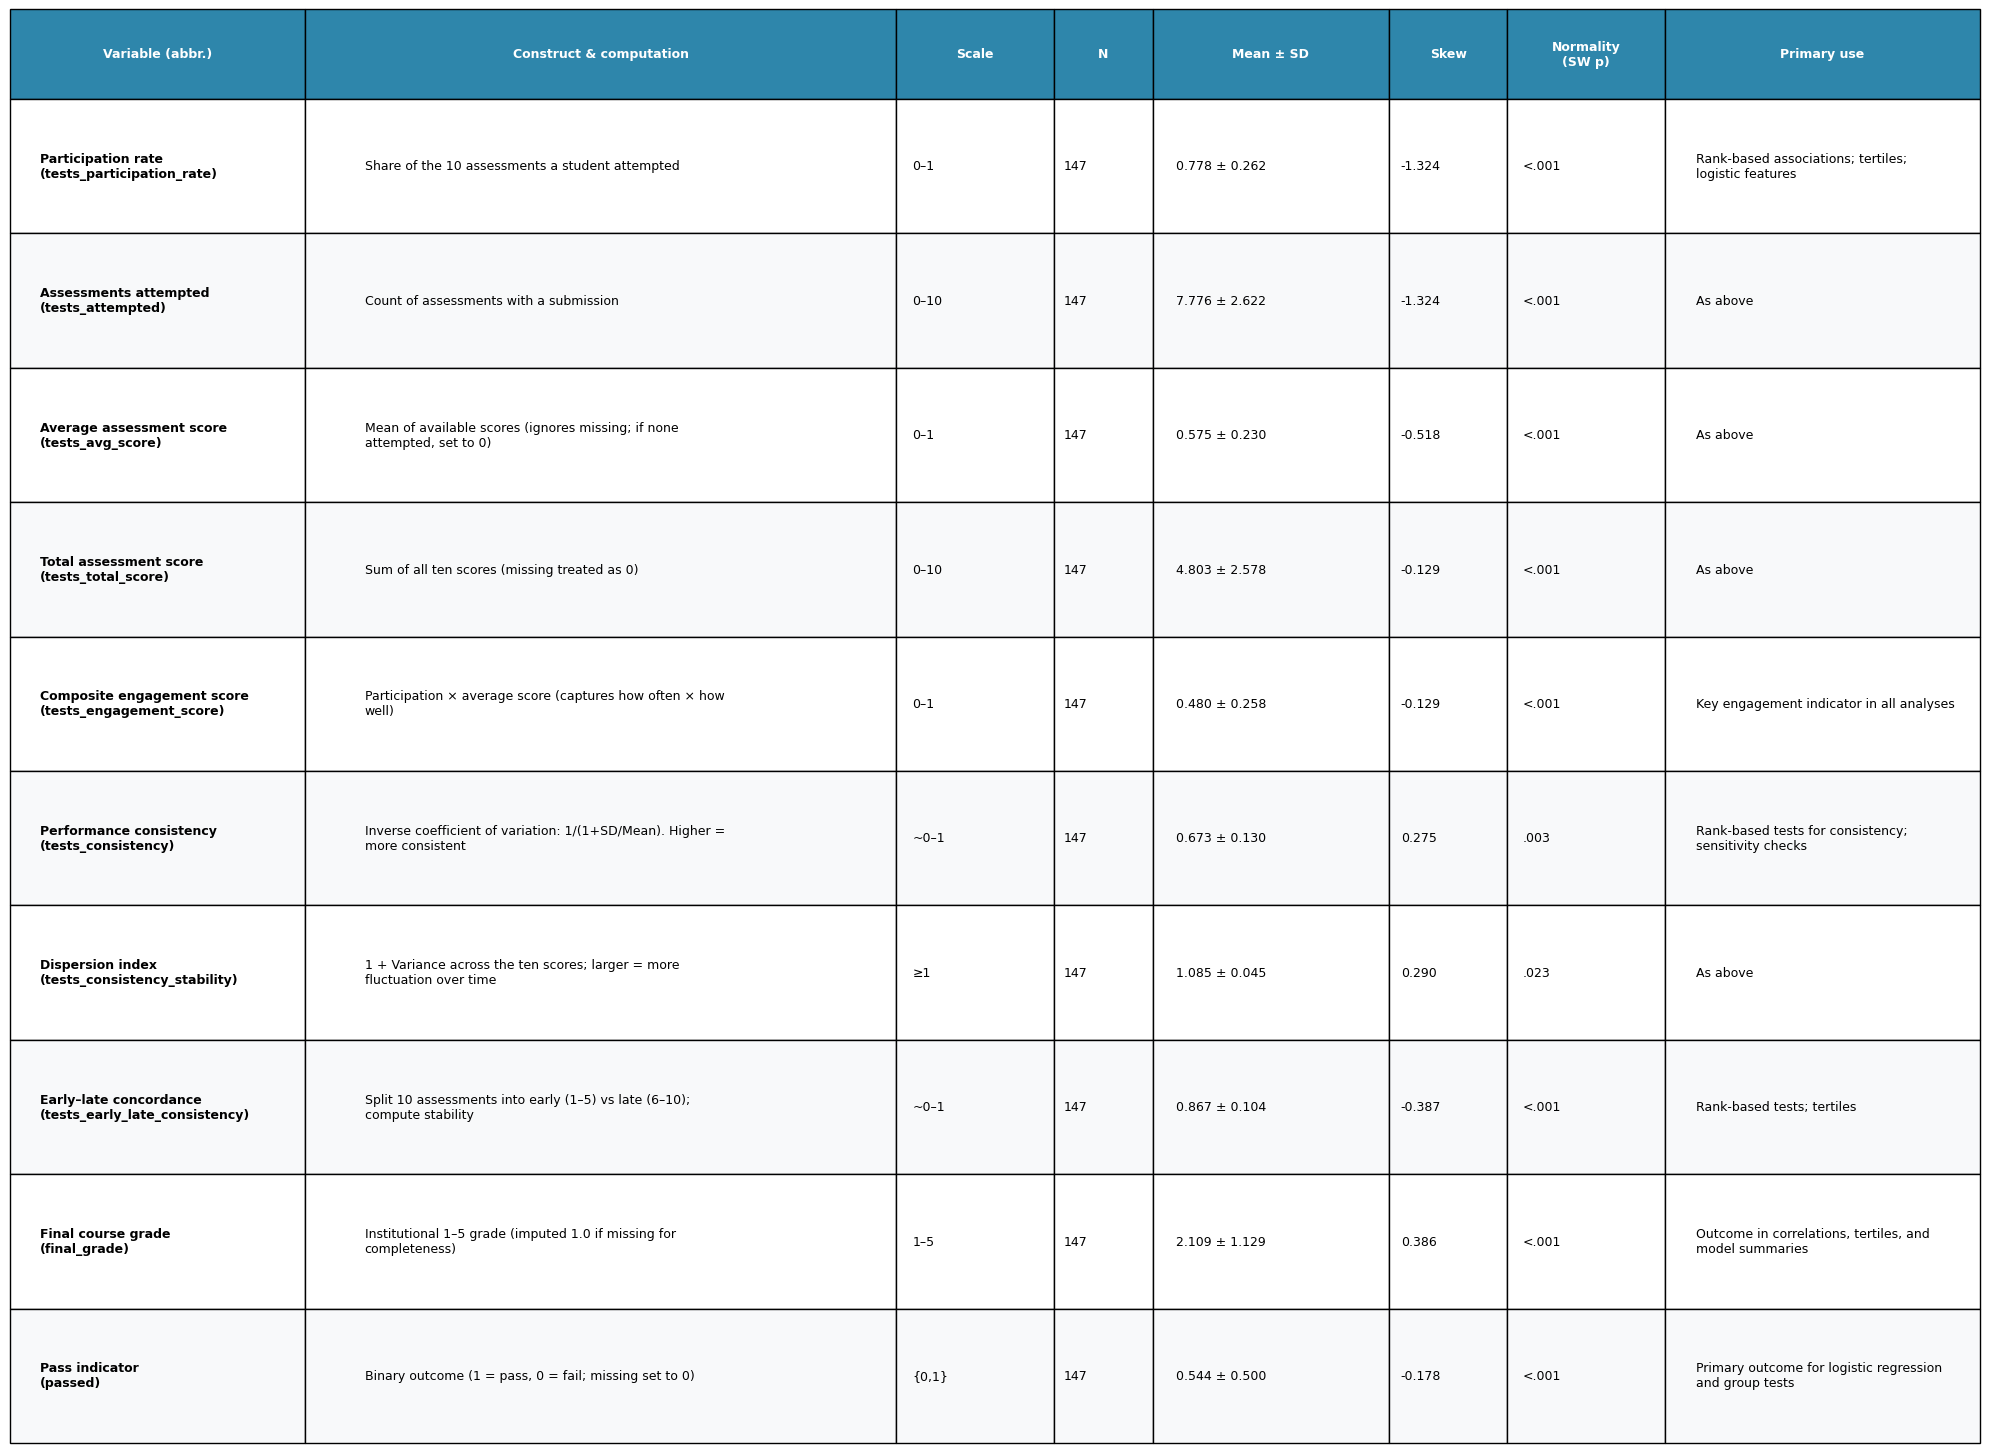

Key Insights from the Table:
• Sample size: N = 147
• All variables show non-normal distributions (SW p < .05)
• Variables with strong negative skew (< -1.0): 2
• Composite engagement score is the key indicator used across analyses
• Pass rate: 54.4%
• Average participation rate: 77.8%
• Most variables require rank-based statistical methods due to non-normality


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

# Set style for better appearance
plt.style.use('default')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

# Complete data from the table including the crucial computation formulas
data = {
    'Variable': [
        'Participation rate',
        'Assessments attempted', 
        'Average assessment score',
        'Total assessment score',
        'Composite engagement score',
        'Performance consistency',
        'Dispersion index',
        'Early–late concordance',
        'Final course grade',
        'Pass indicator'
    ],
    'Abbreviation': [
        'tests_participation_rate',
        'tests_attempted',
        'tests_avg_score', 
        'tests_total_score',
        'tests_engagement_score',
        'tests_consistency',
        'tests_consistency_stability',
        'tests_early_late_consistency',
        'final_grade',
        'passed'
    ],
    'Computation': [
        'Share of the 10 assessments a student attempted',
        'Count of assessments with a submission',
        'Mean of available scores (ignores missing; if none attempted, set to 0)',
        'Sum of all ten scores (missing treated as 0)',
        'Participation × average score (captures how often × how well)',
        'Inverse coefficient of variation: 1/(1+SD/Mean). Higher = more consistent',
        '1 + Variance across the ten scores; larger = more fluctuation over time',
        'Split 10 assessments into early (1–5) vs late (6–10); compute stability',
        'Institutional 1–5 grade (imputed 1.0 if missing for completeness)',
        'Binary outcome (1 = pass, 0 = fail; missing set to 0)'
    ],
    'Scale': [
        '0–1', '0–10', '0–1', '0–10', '0–1', '~0–1', '≥1', '~0–1', '1–5', '{0,1}'
    ],
    'Mean': [0.778, 7.776, 0.575, 4.803, 0.480, 0.673, 1.085, 0.867, 2.109, 0.544],
    'SD': [0.262, 2.622, 0.230, 2.578, 0.258, 0.130, 0.045, 0.104, 1.129, 0.500],
    'Skew': [-1.324, -1.324, -0.518, -0.129, -0.129, 0.275, 0.290, -0.387, 0.386, -0.178],
    'Normality_p': ['<.001', '<.001', '<.001', '<.001', '<.001', '.003', '.023', '<.001', '<.001', '<.001'],
    'Primary_use': [
        'Rank-based associations; tertiles; logistic features',
        'As above',
        'As above', 
        'As above',
        'Key engagement indicator in all analyses',
        'Rank-based tests for consistency; sensitivity checks',
        'As above',
        'Rank-based tests; tertiles',
        'Outcome in correlations, tertiles, and model summaries',
        'Primary outcome for logistic regression and group tests'
    ]
}

# Create the comprehensive table figure
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('tight')
ax.axis('off')

# Prepare table data with proper formatting
table_data = []
for i in range(len(data['Variable'])):
    # Break long computation text into multiple lines for readability
    computation_text = data['Computation'][i]
    if len(computation_text) > 60:
        # Simple word wrapping
        words = computation_text.split(' ')
        lines = []
        current_line = []
        current_length = 0
        for word in words:
            if current_length + len(word) + 1 <= 60:
                current_line.append(word)
                current_length += len(word) + 1
            else:
                lines.append(' '.join(current_line))
                current_line = [word]
                current_length = len(word)
        if current_line:
            lines.append(' '.join(current_line))
        computation_text = '\n'.join(lines)
    
    # Break primary use text similarly
    use_text = data['Primary_use'][i]
    if len(use_text) > 40:
        words = use_text.split(' ')
        lines = []
        current_line = []
        current_length = 0
        for word in words:
            if current_length + len(word) + 1 <= 40:
                current_line.append(word)
                current_length += len(word) + 1
            else:
                lines.append(' '.join(current_line))
                current_line = [word]
                current_length = len(word)
        if current_line:
            lines.append(' '.join(current_line))
        use_text = '\n'.join(lines)
    
    table_data.append([
        f"{data['Variable'][i]}\n({data['Abbreviation'][i]})",
        computation_text,
        data['Scale'][i],
        '147',
        f"{data['Mean'][i]:.3f} ± {data['SD'][i]:.3f}",
        f"{data['Skew'][i]:.3f}",
        data['Normality_p'][i],
        use_text
    ])

# Column headers
headers = ['Variable (abbr.)', 'Construct & computation', 'Scale', 'N', 'Mean ± SD', 'Skew', 'Normality\n(SW p)', 'Primary use']

# Create the table
table = ax.table(cellText=table_data,
                colLabels=headers,
                cellLoc='left',
                loc='center',
                colWidths=[0.15, 0.3, 0.08, 0.05, 0.12, 0.06, 0.08, 0.16])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 3)  # Increase row height for better readability

# Color scheme
header_color = '#2E86AB'
alt_row_color = '#F8F9FA'
regular_row_color = '#FFFFFF'

# Style header row
for j in range(len(headers)):
    cell = table[(0, j)]
    cell.set_facecolor(header_color)
    cell.set_text_props(weight='bold', color='white')
    cell.set_height(0.08)

# Style data rows
for i in range(1, len(data['Variable']) + 1):
    for j in range(len(headers)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor(alt_row_color)
        else:
            cell.set_facecolor(regular_row_color)
        
        # Make variable names bold
        if j == 0:
            cell.set_text_props(weight='bold')
        
        # Adjust cell heights
        cell.set_height(0.12)

# Add title and subtitle
# plt.suptitle('Statistical Summary of Assessment Variables', 
#             fontsize=18, fontweight='bold', y=0.95)
# plt.figtext(0.5, 0.92, 'Educational Assessment Study (N = 147)', 
#            ha='center', fontsize=14, style='italic')

# Add a note about the table structure
# plt.figtext(0.5, 0.02, 
#            'Note: All variables show non-normal distributions (Shapiro-Wilk p < .05). '
#            'Rank-based methods recommended for statistical analyses.',
#            ha='center', fontsize=10, style='italic', wrap=True)

plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.08)

# Show the plot
plt.show()

# Print key insights
print("Key Insights from the Table:")
print("="*50)
print(f"• Sample size: N = 147")
print(f"• All variables show non-normal distributions (SW p < .05)")
print(f"• Variables with strong negative skew (< -1.0): {sum(1 for s in data['Skew'] if s < -1.0)}")
print(f"• Composite engagement score is the key indicator used across analyses")
print(f"• Pass rate: {data['Mean'][9]*100:.1f}%")
print(f"• Average participation rate: {data['Mean'][0]*100:.1f}%")
print("• Most variables require rank-based statistical methods due to non-normality")

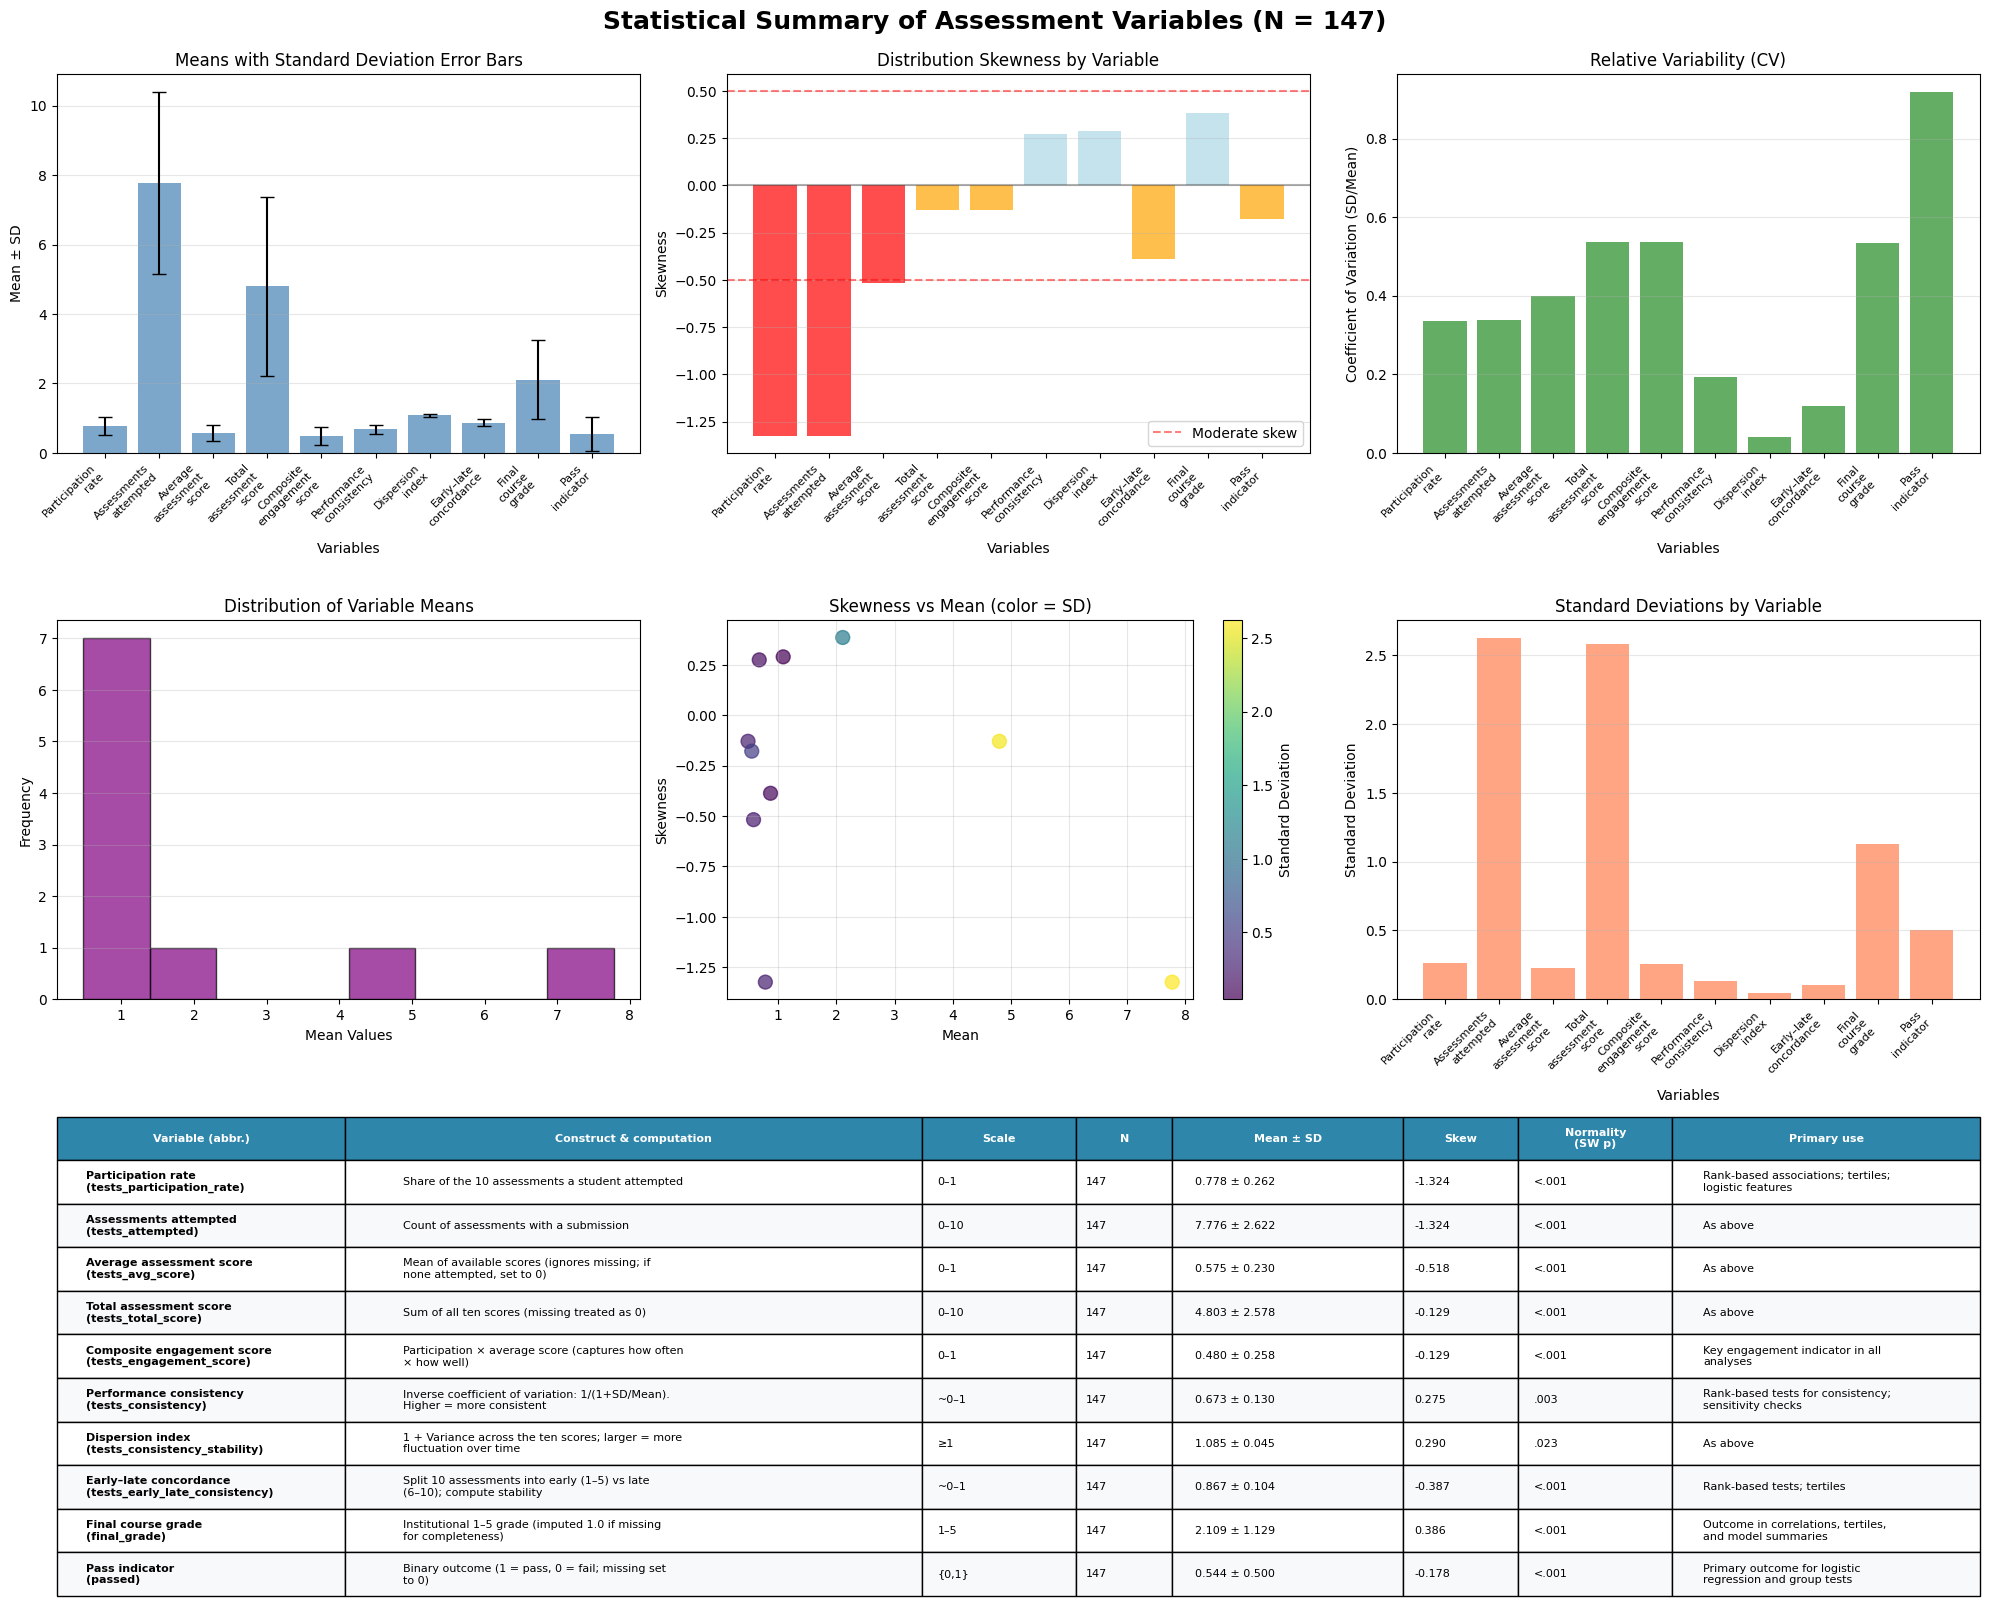

Key Insights:
• Sample size: N = 147
• Variables with strong negative skew (< -1.0): 2
• All variables show non-normal distributions
• Pass rate: 54.4%
• Average participation rate: 77.8%
• Composite engagement score combines frequency and quality


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

# Set style for better appearance
plt.style.use('default')
plt.rcParams['font.size'] = 10

# Complete data from the table including the crucial computation formulas
data = {
    'Variable': [
        'Participation rate',
        'Assessments attempted', 
        'Average assessment score',
        'Total assessment score',
        'Composite engagement score',
        'Performance consistency',
        'Dispersion index',
        'Early–late concordance',
        'Final course grade',
        'Pass indicator'
    ],
    'Abbreviation': [
        'tests_participation_rate',
        'tests_attempted',
        'tests_avg_score', 
        'tests_total_score',
        'tests_engagement_score',
        'tests_consistency',
        'tests_consistency_stability',
        'tests_early_late_consistency',
        'final_grade',
        'passed'
    ],
    'Computation': [
        'Share of the 10 assessments a student attempted',
        'Count of assessments with a submission',
        'Mean of available scores (ignores missing; if none attempted, set to 0)',
        'Sum of all ten scores (missing treated as 0)',
        'Participation × average score (captures how often × how well)',
        'Inverse coefficient of variation: 1/(1+SD/Mean). Higher = more consistent',
        '1 + Variance across the ten scores; larger = more fluctuation over time',
        'Split 10 assessments into early (1–5) vs late (6–10); compute stability',
        'Institutional 1–5 grade (imputed 1.0 if missing for completeness)',
        'Binary outcome (1 = pass, 0 = fail; missing set to 0)'
    ],
    'Scale': [
        '0–1', '0–10', '0–1', '0–10', '0–1', '~0–1', '≥1', '~0–1', '1–5', '{0,1}'
    ],
    'Mean': [0.778, 7.776, 0.575, 4.803, 0.480, 0.673, 1.085, 0.867, 2.109, 0.544],
    'SD': [0.262, 2.622, 0.230, 2.578, 0.258, 0.130, 0.045, 0.104, 1.129, 0.500],
    'Skew': [-1.324, -1.324, -0.518, -0.129, -0.129, 0.275, 0.290, -0.387, 0.386, -0.178],
    'Normality_p': ['<.001', '<.001', '<.001', '<.001', '<.001', '.003', '.023', '<.001', '<.001', '<.001'],
    'Primary_use': [
        'Rank-based associations; tertiles; logistic features',
        'As above',
        'As above', 
        'As above',
        'Key engagement indicator in all analyses',
        'Rank-based tests for consistency; sensitivity checks',
        'As above',
        'Rank-based tests; tertiles',
        'Outcome in correlations, tertiles, and model summaries',
        'Primary outcome for logistic regression and group tests'
    ]
}

# Create comprehensive figure with both visualizations and table
fig = plt.figure(figsize=(20, 16))

# ===== VISUALIZATION SECTION =====
# 1. Means and Standard Deviations
ax1 = plt.subplot(3, 3, 1)
x_pos = np.arange(len(data['Variable']))
bars = plt.bar(x_pos, data['Mean'], yerr=data['SD'], capsize=5, alpha=0.7, color='steelblue')
plt.xlabel('Variables')
plt.ylabel('Mean ± SD')
plt.title('Means with Standard Deviation Error Bars')
plt.xticks(x_pos, [v.replace(' ', '\n') for v in data['Variable']], rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', alpha=0.3)

# 2. Skewness distribution
ax2 = plt.subplot(3, 3, 2)
colors = ['red' if s < -0.5 else 'orange' if s < 0 else 'lightblue' if s < 0.5 else 'darkblue' for s in data['Skew']]
bars = plt.bar(x_pos, data['Skew'], color=colors, alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.title('Distribution Skewness by Variable')
plt.xticks(x_pos, [v.replace(' ', '\n') for v in data['Variable']], rotation=45, ha='right', fontsize=8)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=-0.5, color='red', linestyle='--', alpha=0.5, label='Moderate skew')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# 3. Coefficient of Variation (CV = SD/Mean)
ax3 = plt.subplot(3, 3, 3)
cv = [sd/mean if mean != 0 else 0 for mean, sd in zip(data['Mean'], data['SD'])]
plt.bar(x_pos, cv, alpha=0.7, color='forestgreen')
plt.xlabel('Variables')
plt.ylabel('Coefficient of Variation (SD/Mean)')
plt.title('Relative Variability (CV)')
plt.xticks(x_pos, [v.replace(' ', '\n') for v in data['Variable']], rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', alpha=0.3)

# 4. Distribution of means across variables
ax4 = plt.subplot(3, 3, 4)
plt.hist(data['Mean'], bins=8, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Distribution of Variable Means')
plt.grid(axis='y', alpha=0.3)

# 5. Skewness vs Mean scatter plot
ax5 = plt.subplot(3, 3, 5)
plt.scatter(data['Mean'], data['Skew'], alpha=0.7, s=100, c=data['SD'], cmap='viridis')
plt.xlabel('Mean')
plt.ylabel('Skewness')
plt.title('Skewness vs Mean (color = SD)')
plt.grid(alpha=0.3)
plt.colorbar(label='Standard Deviation')

# 6. Standard deviation comparison
ax6 = plt.subplot(3, 3, 6)
plt.bar(x_pos, data['SD'], alpha=0.7, color='coral')
plt.xlabel('Variables')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviations by Variable')
plt.xticks(x_pos, [v.replace(' ', '\n') for v in data['Variable']], rotation=45, ha='right', fontsize=8)
plt.grid(axis='y', alpha=0.3)

# ===== TABLE SECTION =====
ax_table = plt.subplot(3, 1, 3)
ax_table.axis('tight')
ax_table.axis('off')

# Prepare table data with proper formatting
table_data = []
for i in range(len(data['Variable'])):
    # Break long computation text into multiple lines for readability
    computation_text = data['Computation'][i]
    if len(computation_text) > 50:
        words = computation_text.split(' ')
        lines = []
        current_line = []
        current_length = 0
        for word in words:
            if current_length + len(word) + 1 <= 50:
                current_line.append(word)
                current_length += len(word) + 1
            else:
                lines.append(' '.join(current_line))
                current_line = [word]
                current_length = len(word)
        if current_line:
            lines.append(' '.join(current_line))
        computation_text = '\n'.join(lines)
    
    # Break primary use text similarly
    use_text = data['Primary_use'][i]
    if len(use_text) > 35:
        words = use_text.split(' ')
        lines = []
        current_line = []
        current_length = 0
        for word in words:
            if current_length + len(word) + 1 <= 35:
                current_line.append(word)
                current_length += len(word) + 1
            else:
                lines.append(' '.join(current_line))
                current_line = [word]
                current_length = len(word)
        if current_line:
            lines.append(' '.join(current_line))
        use_text = '\n'.join(lines)
    
    table_data.append([
        f"{data['Variable'][i]}\n({data['Abbreviation'][i]})",
        computation_text,
        data['Scale'][i],
        '147',
        f"{data['Mean'][i]:.3f} ± {data['SD'][i]:.3f}",
        f"{data['Skew'][i]:.3f}",
        data['Normality_p'][i],
        use_text
    ])

# Column headers
headers = ['Variable (abbr.)', 'Construct & computation', 'Scale', 'N', 'Mean ± SD', 'Skew', 'Normality\n(SW p)', 'Primary use']

# Create the table
table = ax_table.table(cellText=table_data,
                      colLabels=headers,
                      cellLoc='left',
                      loc='center',
                      colWidths=[0.15, 0.3, 0.08, 0.05, 0.12, 0.06, 0.08, 0.16])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2.5)

# Color scheme
header_color = '#2E86AB'
alt_row_color = '#F8F9FA'
regular_row_color = '#FFFFFF'

# Style header row
for j in range(len(headers)):
    cell = table[(0, j)]
    cell.set_facecolor(header_color)
    cell.set_text_props(weight='bold', color='white')

# Style data rows
for i in range(1, len(data['Variable']) + 1):
    for j in range(len(headers)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor(alt_row_color)
        else:
            cell.set_facecolor(regular_row_color)
        
        # Make variable names bold
        if j == 0:
            cell.set_text_props(weight='bold')

# Add overall title
plt.suptitle('Statistical Summary of Assessment Variables (N = 147)', 
            fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.94, bottom=0.02)

# Show the plot
plt.show()

# Print key insights
print("Key Insights:")
print("="*50)
print(f"• Sample size: N = 147")
print(f"• Variables with strong negative skew (< -1.0): {sum(1 for s in data['Skew'] if s < -1.0)}")
print(f"• All variables show non-normal distributions")
print(f"• Pass rate: {data['Mean'][9]*100:.1f}%")
print(f"• Average participation rate: {data['Mean'][0]*100:.1f}%")
print(f"• Composite engagement score combines frequency and quality")